# Exploring cv2 <a id="top"></a>

- [Kernels](#kernels)
- [Erosion](#erosion)
- [Dilation](#dilation)
- [Opening](#opening)
- [Closing](#closing)
- [Gradient](#gradient)
- [Top hat](#top_hat)
- [Black hat](#black_hat)

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def plot(images=[], titles=[], figsize=(6,6)):
    """
    """
    kernel = np.ones((5,5),np.uint8)

    assert len(images) == len(titles)
    
    if len(images) == 1:
        plt.imshow(images[0], cmap="gray")
        plt.title(titles[0])
        plt.show()
    
    if len(images) > 1:
        fig, ax = plt.subplots(nrows=1, ncols=len(images), figsize=figsize)
        
        for i in range(len(images)):
            image = images[i]
            title = titles[i]
    
            ax[i].imshow(image, cmap="gray")
            ax[i].set_title(title)
            
        plt.show()

## Original Image <a id="erosion"></a>

[Back to top](#top)

In [29]:
img = cv.imread('j.png', 0)

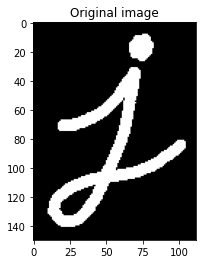

In [70]:
plot([img], ["Original image"])

## Kernels <a id="kernels"></a>

Kernels

[Back to top](#top)

In [94]:
# Rectangular Kernel
rect_kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,5))

# Elliptical Kernel
ellipse_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

# Cross-shaped Kernel
cross_kernel = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

print("Rectangular kernel:\n", rect_kernel, end="\n\n")
print("Elliptical kernel:\n", ellipse_kernel, end="\n\n")
print("Cross-shaped kernel:\n", cross_kernel, end="\n\n")

Rectangular kernel:
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Elliptical kernel:
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]

Cross-shaped kernel:
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]



## Erosion <a id="erosion"></a>

If **all** the underlying values of the kernel are 1, then return 1, else return 0.

[Back to top](#top)

In [14]:
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img, kernel,iterations = 1)

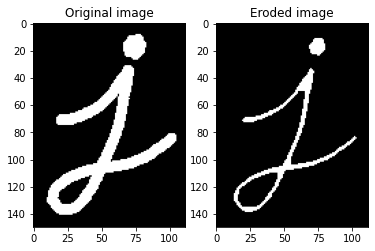

In [75]:
plot(images=[img, erosion],
     titles=["Original image", "Eroded image"])

## Dilation <a id="dilation"></a>

If **any** the underlying values of the kernel are 1, then return 1, else return 0.

[Back to top](#top)

In [16]:
kernel = np.ones((5,5),np.uint8)
dilate = cv.dilate(img, kernel, iterations = 1)

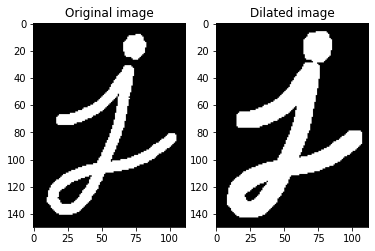

In [76]:
plot(images=[img, dilate],
     titles=["Original image", "Dilated image"])

## Opening <a id="opening"></a>

[Erosion](#erosion) followed by [dilation](#dilation), useful in **removing noise**.

[Back to top](#top)

In [19]:
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

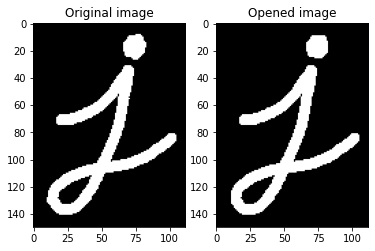

In [77]:
plot(images=[img, opening],
     titles=["Original image", "Opened image"])

## Closing

[Dilation](#dilation) followed by [erosion](#erosion), useful in **closing small holes inside the foreground objects, or small black points on the object**.

[Back to top](#top)

In [46]:
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

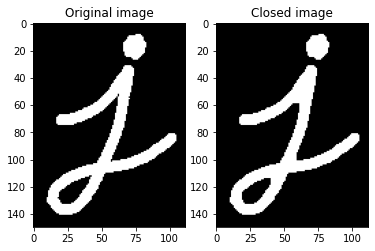

In [59]:
plot(images=[img, closing],
     titles=["Original image", "Closed image"])

## Gradient Image <a id="gradient"></a>

It is the **difference between dilation and erosion** of an image.

[Back to top](#top)

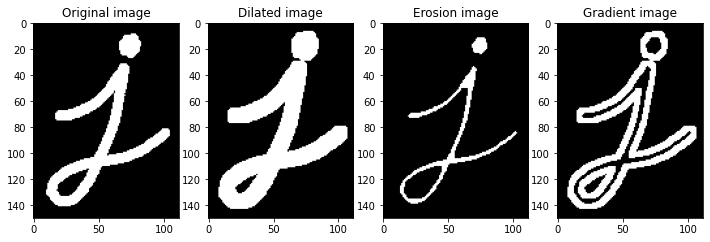

In [81]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
dilate = cv.dilate(img,kernel,iterations = 1)
erosion = cv.erode(img,kernel,iterations = 1)

plot(images=[img, dilate, erosion, gradient],
     titles=["Original image", "Dilated image", "Erosion image", "Gradient image"], 
     figsize=(12,12))

## Top Hat <a id="top_hat"></a>

It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

[Back to top](#top)

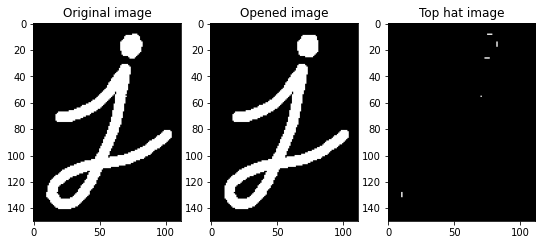

In [87]:
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

plot(images=[img, opening, tophat], 
     titles=["Original image", "Opened image", "Top hat image"],
         figsize=(9,9))

## Black Hat <a id="black_hat"></a>
    
It is the **difference between the closing of the input image and input image.**

[Back to top](#top)

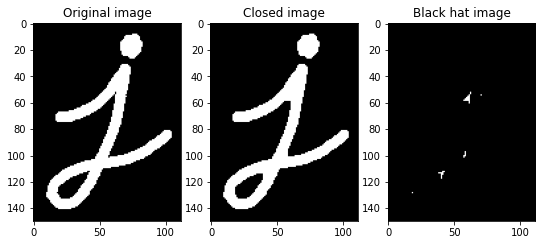

In [95]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plot(images=[img, closing, blackhat], 
     titles=["Original image", "Closed image", "Black hat image"],
         figsize=(9,9))